EDA 

In [15]:
#Team members:Bhavana Meravanige, Raksha Ravishankar, Sonia Bathla
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#loading the Data Set
solar_data = pd.read_csv(r"C:\Users\bathl\OneDrive\Documents\SJSU\Machine_Learning\Project\solar_data.csv")

In [7]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4926 entries, 0 to 4925
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4926 non-null   int64  
 1   County            4926 non-null   object 
 2   Acres             4926 non-null   float64
 3   InstallType       4926 non-null   object 
 4   UrbanRural        4926 non-null   object 
 5   Class             4926 non-null   object 
 6   DistSub_100       4926 non-null   float64
 7   Percent_100       4926 non-null   object 
 8   Substation_100    4926 non-null   object 
 9   HIFLD_100         4926 non-null   int64  
 10  DistSub_200       4926 non-null   float64
 11  Percent_200       4926 non-null   object 
 12  Substation_200    4926 non-null   object 
 13  HIFLD_200         4926 non-null   int64  
 14  DistSub_CAISO     4926 non-null   float64
 15  Percent_CAISO     4926 non-null   object 
 16  Substation_CAISO  4926 non-null   object 


In [9]:
solar_data.head(5)

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336
1,2,Alameda,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878
2,3,Alameda,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263
3,4,Alameda,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.626699,0-25,Los Esteros,310258,Within,5763.905754,344.705846
4,5,Alameda,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0-25,Dixon Landing,309200,...,0-25,Los Esteros,310258,2.728629,25-50,Los Esteros,310258,Within,3983.859693,283.968425


C:\Users\bathl\AppData\Local\Temp\ipykernel_25792\3383375115.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='installation_count', y='County', data=county_installations.head(10), palette='Blues_d', legend=False)


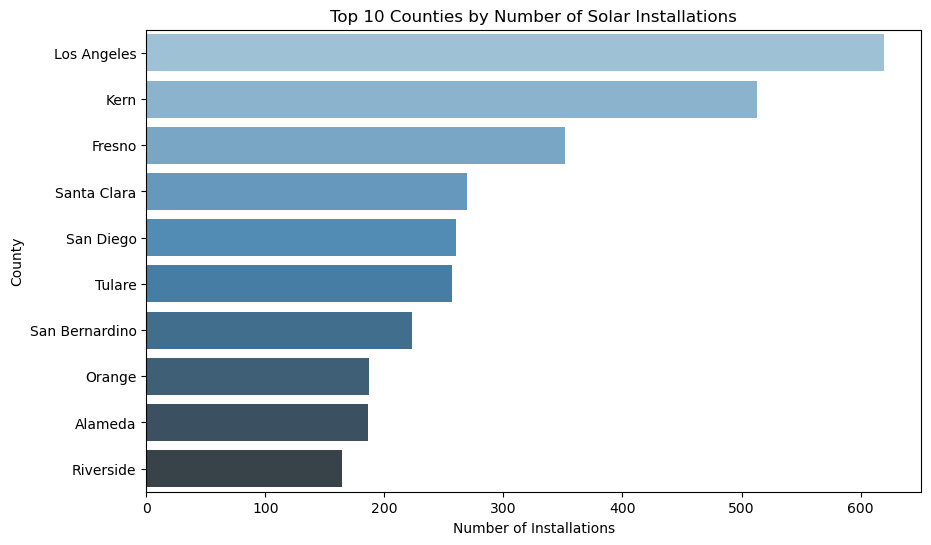

In [27]:
# Top counties with the most solar installations
# Group the data by county
county_installations = solar_data.groupby('County').size().reset_index(name='installation_count')

# Sort the data
county_installations = county_installations.sort_values(by='installation_count', ascending=False)

# Plot the top counties with the most solar installations
plt.figure(figsize=(10, 6))

sns.barplot(x='installation_count', y='County', data=county_installations.head(10), palette='Blues_d', legend=False)

plt.title('Top 10 Counties by Number of Solar Installations')
plt.xlabel('Number of Installations')
plt.ylabel('County')
plt.show()


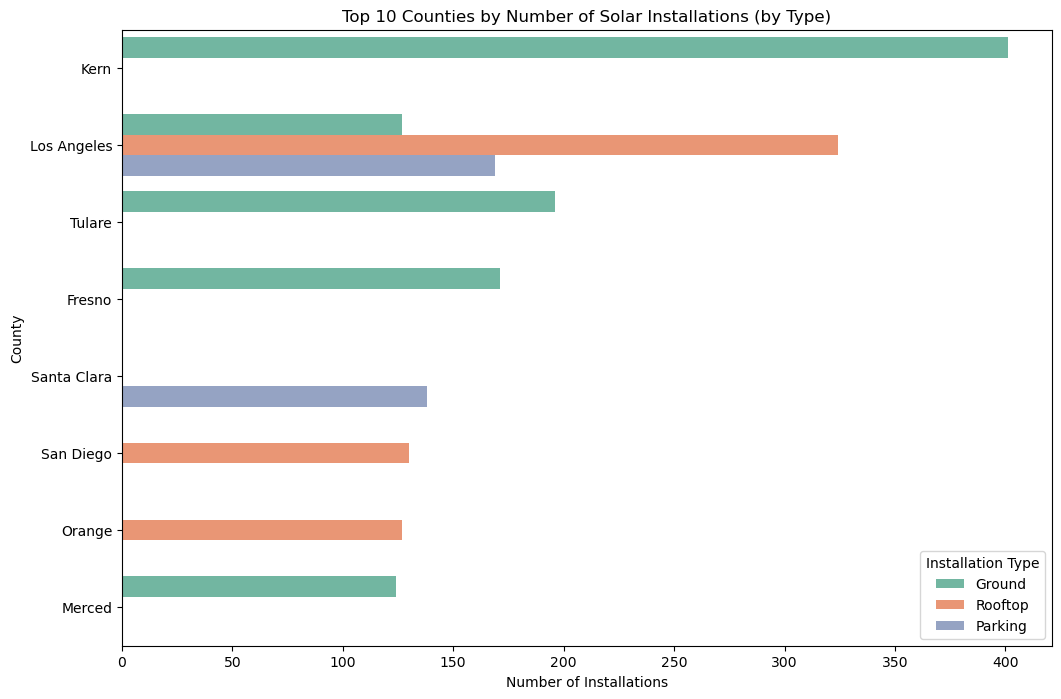

In [39]:
# Top counties with the most solar installations by install type
# Group the data by county and installation type
county_installations = solar_data.groupby(['County', 'InstallType']).size().reset_index(name='installation_count')

# Sort the data 
county_installations = county_installations.sort_values(by='installation_count', ascending=False)

plt.figure(figsize=(12, 8))

# Use of 'InstallType' as the hue for differentiation
sns.barplot(x='installation_count', y='County', hue='InstallType', data=county_installations.head(10), palette='Set2')

plt.title('Top 10 Counties by Number of Solar Installations (by Type)')
plt.xlabel('Number of Installations')
plt.ylabel('County')
plt.legend(title='Installation Type')
plt.show()


C:\Users\bathl\AppData\Local\Temp\ipykernel_25792\2325415749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='UrbanRural', data=solar_data, palette='magma')


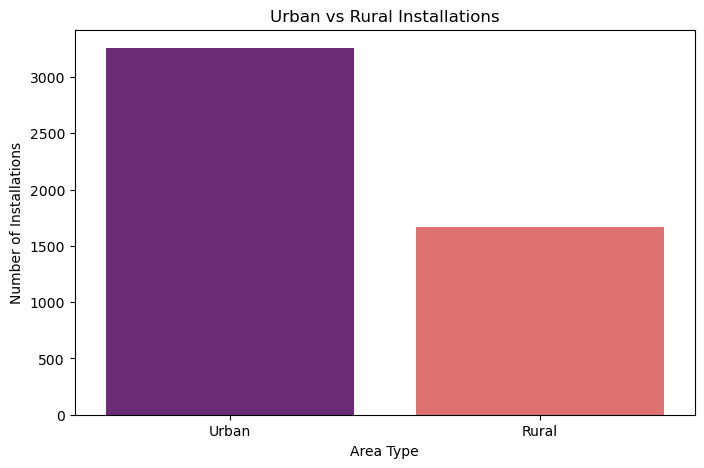

In [53]:
# Plot for Urban vs Rural Installations
plt.figure(figsize=(8, 5))
sns.countplot(x='UrbanRural', data=solar_data, palette='magma')
plt.title('Urban vs Rural Installations')
plt.xlabel('Area Type')
plt.ylabel('Number of Installations')
plt.show()


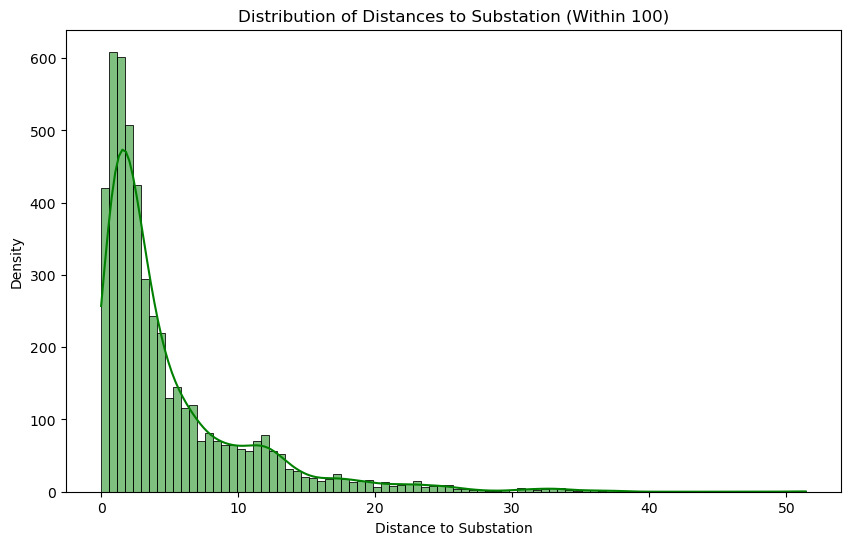

In [57]:
# Plot for Distribution of Distances to Substation 
plt.figure(figsize=(10, 6))
sns.histplot(solar_data['DistSub_100'], kde=True, color='green')
plt.title('Distribution of Distances to Substation (Within 100)')
plt.xlabel('Distance to Substation')
plt.ylabel('Density')
plt.show()


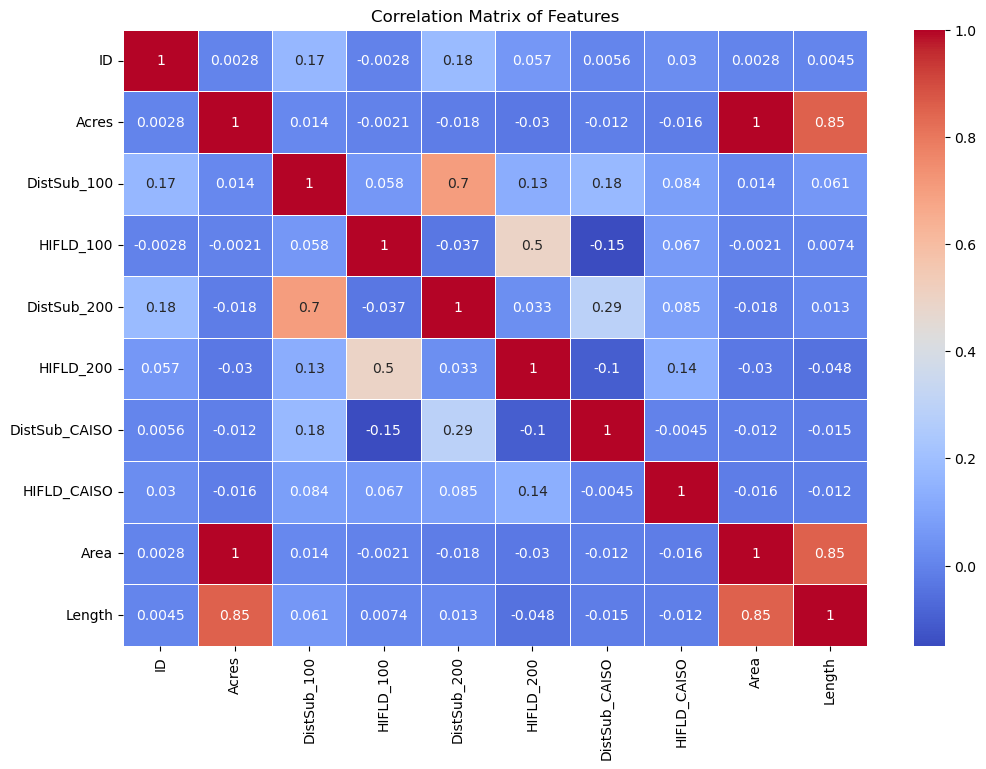

In [62]:
# Correlation Matrix
# Select only numeric columns for the correlation matrix
numeric_solar_data = solar_data.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_solar_data.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


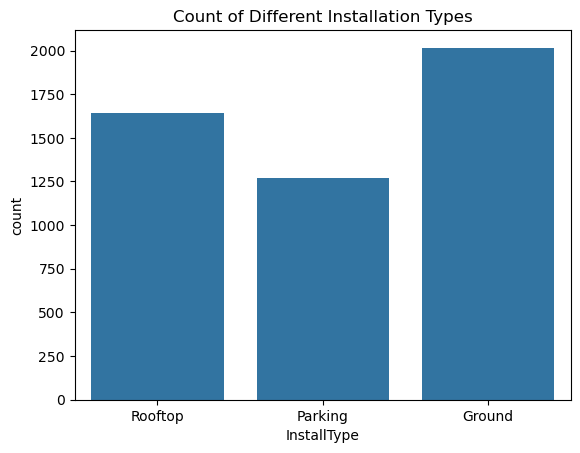

In [68]:
# Plot for installation types
sns.countplot(x='InstallType', data=solar_data)
plt.title('Count of Different Installation Types')
plt.show()


C:\Users\bathl\AppData\Local\Temp\ipykernel_25792\3483475608.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='InstallType', y='Acres', data=mean_acres, palette='muted')


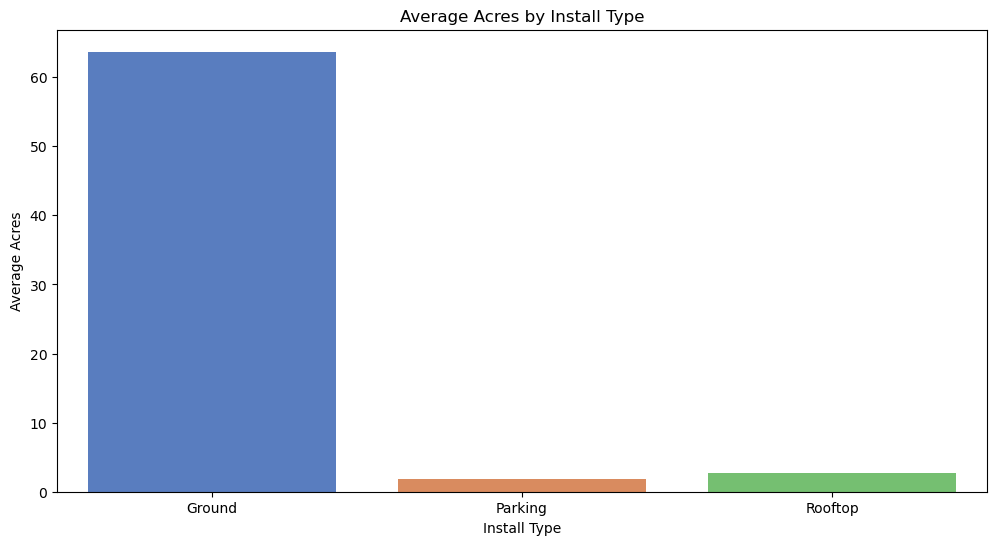

In [84]:
# Plot for Acres by Install Type
# Calculate mean acres by installation type
mean_acres = solar_data.groupby('InstallType')['Acres'].mean().reset_index()

# Bar plot of mean Acres by Install Type
plt.figure(figsize=(12, 6))
sns.barplot(x='InstallType', y='Acres', data=mean_acres, palette='muted')
plt.title('Average Acres by Install Type')
plt.ylabel('Average Acres')
plt.xlabel('Install Type')
plt.show()
